In [1]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint
from datetime import date
from os import path


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
html_text = requests.get('https://www.compari.ro/placi-video-c3142/',headers=headers)
soup = BeautifulSoup(html_text.text,'lxml')
Placi_Video = soup.find_all('div',class_='col-lg-6 col-md-6 col-sm-6 col-xs-8 top-center')

Nume = []
Lista_Pret = []
Link_curat = []
Titlu = []
today = date.today()
data_curr = []
Chipset =[]
Ventilatoare = []

lista_link = []
counter = 0
for Placa in Placi_Video:
    link=Placa.find('a',href = True)
    lista_link.append(link['href'])
    

In [2]:
from datetime import date, datetime

for i in lista_link:
    html_link2 = requests.get(i,headers=headers)
    soup2 = BeautifulSoup(html_link2.text,'lxml')
    
    Pret = soup2.find('span',class_='price').text.replace('RON','').replace(',','.').replace('de la','').replace(' ','')
    
    Surse = soup2.find_all('div',class_='optoffer device-desktop')
    for Sursa in Surse:
        Pret_Surse = Sursa.find('div',class_='row-price').text.replace('RON','').replace(',','.').replace('de la','').replace(' ','')
        
        if Pret == Pret_Surse:
                Link_Sursa = Sursa.find('a',href=True)
                Link_curat.append(Link_Sursa['href'])
                Titlu.append(Sursa.find('div',class_='col-button button-box').text.replace('spre magazin »',''))
                Nume.append(soup2.find('h1',class_='visible-xs').text.replace('\n','').replace('Placa video','').replace('   ',''))
                Lista_Pret.append(soup2.find('span',class_='price').text.replace('RON','').replace(',','.').replace('de la','').replace(' ',''))
                data_curr.append(today.strftime("%d/%m/%Y"))
                Chipset.append(soup2.find('td',text = 'Familie chipset video').find_next_sibling('td').text)
                Ventilatoare.append(soup2.find('td',text = 'Numar ventilatoare').find_next_sibling('td').text.replace('buc',''))
        else:
            Link_Sursa = 'Nu s a gasit'
    

for i in range(len(Lista_Pret)):
    Lista_Pret[i] = float(Lista_Pret[i])
    Ventilatoare[i] = float(Ventilatoare[i])
    

In [3]:
import pandas as pd

Daily_GPA_df = pd.DataFrame()
Daily_GPA_df['Data curenta'] = data_curr
Daily_GPA_df['Denumire Produs'] = Nume
Daily_GPA_df['Pret LEI'] = Lista_Pret
Daily_GPA_df['Site'] = Titlu
Daily_GPA_df['Sursa'] = Link_curat
Daily_GPA_df['Chipset'] = Chipset
Daily_GPA_df['Nr Ventilatoare'] = Ventilatoare
print(Daily_GPA_df)

   Data curenta                                    Denumire Produs  Pret LEI  \
0    21/10/2021    MSI GeForce RTX 3060 X 12GB GDRR6 192bit (RT...   3920.99   
1    21/10/2021    GIGABYTE GeForce RTX 3060 12GB OC GDDR6 192b...   4224.50   
2    21/10/2021    GIGABYTE GeForce RTX 3060 Ti 8GB GDDR6 256bi...   4599.00   
3    21/10/2021    GIGABYTE GeForce RTX 3090 GAMING OC 24GB GDD...  13999.00   
4    21/10/2021    MSI GeForce RTX 3070 Ti 8GB GDDR6 256bit (RT...   5932.00   
5    21/10/2021    ZOTAC GeForce RTX 3060 Twin Edge OC 12GB GDD...   3599.00   
6    21/10/2021    GIGABYTE GeForce EAGLE RTX 3060 Ti 8GB GDDR6...   4880.99   
7    21/10/2021    GIGABYTE GeForce EAGLE RTX 3060 Ti 8GB GDDR6...   4880.99   
8    21/10/2021    KFA2 GeForce 1CLICK OC RTX 3060 12GB GDDR6 1...   5999.00   
9    21/10/2021    GIGABYTE GeForce RTX 3060 TI EAGLE OC 8GB GD...   4249.00   
10   21/10/2021    ASRock Radeon RX 6600 XT 8GB GDDR6 (RX6600XT...   4299.00   
11   21/10/2021    GIGABYTE GeForce GTX 

In [12]:
if path.exists('AnalizaPlaci3.xlsx'):
    print('Nu s-a creat')
else:
    Daily_GPA_df.to_excel(r'D:\\Java\\VS-CodPitonul\\Python\\AnalizaPlaci3.xlsx',index=False)
    print('S-a creat')

Nu s-a creat


In [13]:
from openpyxl import load_workbook

GPU_Comparator_df2 = pd.ExcelFile('AnalizaPlaci.xlsx').parse('Sheet1')
if Daily_GPA_df['Data curenta'].iloc[0] != GPU_Comparator_df2['Data curenta'].iloc[-1]:
    book = load_workbook('AnalizaPlaci.xlsx')
    writer = pd.ExcelWriter('AnalizaPlaci.xlsx', engine='openpyxl')
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}

    for sheetname in writer.sheets:
        Daily_GPA_df.to_excel(writer,sheet_name=sheetname, startrow=writer.sheets[sheetname].max_row, index = False,header= False)

    writer.save()
    df3 = pd.read_excel('AnalizaPlaci.xlsx')
    df3.to_excel('AnalizaPlaci3.xlsx',index = False)
else:
    print('Ai adaugat deja azi, incearca maine')


Ai adaugat deja azi, incearca maine


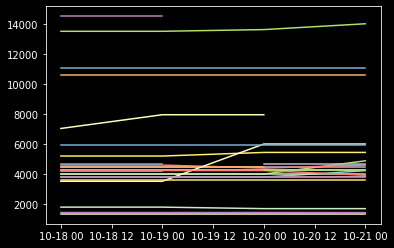

In [110]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Filter_df = pd.read_excel('AnalizaPlaci2.xlsx',index_col=None)
Filter_df = Filter_df.drop('Ventilatoare',axis=1)
Filter_df['Data curenta'] = pd.to_datetime(Filter_df['Data curenta'],format = "%d/%m/%Y")
df3 =Filter_df.groupby(['Data curenta','Denumire Produs']).mean().unstack().reset_index()

A= df3.iloc[:,[0]]
B= df3.iloc[:,1:]

plt.plot(A,B)